# **Convolution, filtering and correlation**


<div style="color:#777777;margin-top: -15px;">
<b>Author</b>: Norman Juchler |
<b>Course</b>: ADLS ISP |
<b>Version</b>: v1.2 <br><br>
<!-- Date: 13.03.2025 -->
<!-- Comments: Fully refactored. -->
</div>

In the lecture, we discussed how convolution is a fundamental operation in signal processing. But why is it so important? Let's explore its significance further in this exercise.


---

## **Preparations**

Let's begin with the usual preparatory steps...

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.fft import (fft, ifft, fftfreq, fftshift,
                       rfft, irfft, rfftfreq)
import soundfile as sf
import scipy.signal 

# For audio playback
from IPython.display import Audio

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

import sys
sys.path.insert(0, "../")
import isp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

<a id='exercise1'></a>

## **&#9734;  Exercise 1 – Filter a noisy signal**

In this exercise, we will address noise in a signal using a simple windowed average filter. This is done by convolving the discrete-time signal, $x[n]$, with a window function. A window function is defined as a function that is zero outside a specified interval and non-zero within that interval. When convolving a signal with a window function, we effectively average the signal over that interval.

This process is a form of **time-domain filtering**, where the signal is manipulated directly in the time domain using the windowed function. The window function is also referred to as the **kernel** of the filter.

### **Instructions**: 
* Read the audio signal from a file.
* Add noise to the signal.
* Choose a window function. You can find a list of available options [here](https://docs.scipy.org/doc/scipy/reference/signal.windows.html).
* Convolve the noisy signal with the window function.
* Visualize and compare the original signal, the noisy signal and the filtered signal
* Analyze the amplitude spectrum of:
  * (The original signal)
  * The noisy signal
  * The filtered signal
  * The window function itself
* Discuss the result:
  * Can you hear a difference between the original and filtered signals? If so, can you explain the reason?
  * Try different window functions. What differences do you observe?
  * How does changing the window width affect the results?


1. I hear a diffrence between the original and the filtered signal, the filtered sound like you're in an airplane there is a little noise in the background. I think the reason is that in the process some information or data is getting lost or not reconstructed to 100%.
2. I don't hear any difference but maybe i used just functions which are very similarly to each other. 
3. With width 300 i don't hear any background noise compared to with 100. And also the plot looks quite different with a higher width there are more points measured i guess. 

'Original'

'Noisy'

'Filtered'

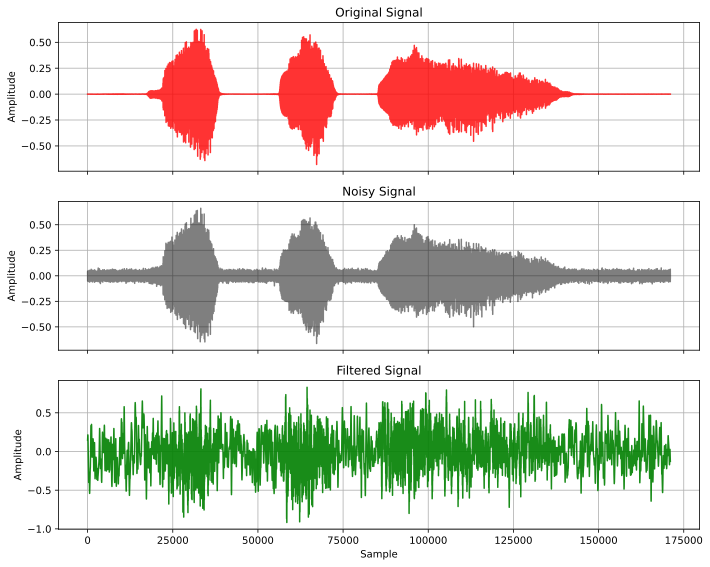

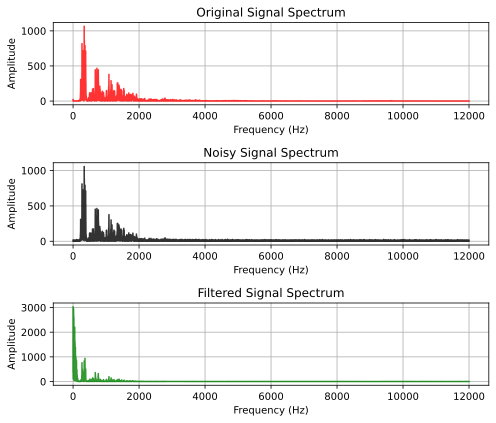

In [14]:
######################
###    EXCERISE    ###
######################

# 1) Load the audio file
audio_file = "../data/signals/fail.mp3"
x, sample_rate = isp.load_audio(audio_file, ensure1d=1)

# 2) Add noise to the signal
noise_std = 0.02    # Standard deviation of the noise
np.random.seed(0)   # Set seed for reproducibility
noise = np.random.normal(loc=0.0, 
                         scale=noise_std, 
                         size=x.shape)
x_noisy = x + noise

# 3) Create the window filter
width = 300
window = scipy.signal.windows.hamming(width)#others tried but deletet it so only one for purpose left here

# 4) Apply the filter to the noisy signal
x_filtered = scipy.signal.convolve(x_noisy,window,mode='same')

# 5) Listen to the results
display("Original")
display(Audio(x, rate=sample_rate))
display("Noisy")
display(Audio(x_noisy, rate=sample_rate))
display("Filtered")
display(Audio(x_filtered, rate=sample_rate))

# 6) Visualize the signals in separate plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), sharex=True)

# Plot Original Signal
axes[0].plot(x, color='red', alpha=0.8)
axes[0].set_title("Original Signal")
axes[0].set_ylabel("Amplitude")
axes[0].grid()

# Plot Noisy Signal
axes[1].plot(x_noisy, color='black', alpha=0.5)
axes[1].set_title("Noisy Signal")
axes[1].set_ylabel("Amplitude")
axes[1].grid()

# Plot Filtered Signal
axes[2].plot(x_filtered, color='green', alpha=0.9)
axes[2].set_title("Filtered Signal")
axes[2].set_xlabel("Sample")
axes[2].set_ylabel("Amplitude")
axes[2].grid()
plt.tight_layout()
plt.show()


# 7) Visualize the signals in the frequency domain
# Plot the amplitude spectrum of the original, noisy, and filtered signals

def plot_amplitude_spectrum(signal, sample_rate, title, color):
    freqs = rfftfreq(len(signal), d=1/sample_rate)
    spectrum = np.abs(rfft(signal))
    
    plt.plot(freqs, spectrum, color=color, alpha=0.8)
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()

# Compute and plot the Fourier Transform of the signals
plt.figure(figsize=(7, 6))

# Plot Original Signal Spectrum
plt.subplot(3, 1, 1)
plot_amplitude_spectrum(x, sample_rate, "Original Signal Spectrum", "red")

# Plot Noisy Signal Spectrum
plt.subplot(3, 1, 2)
plot_amplitude_spectrum(x_noisy, sample_rate, "Noisy Signal Spectrum", "black")

# Plot Filtered Signal Spectrum
plt.subplot(3, 1, 3)
plot_amplitude_spectrum(x_filtered, sample_rate, "Filtered Signal Spectrum", "green")

plt.tight_layout()
plt.show()


---

<a id='exercise2'></a>

## **&#9734; Exercise 2 – Explore the convolution**

In this exercise, we compare different methods for performing the convolution of two signals in Python. Let's first recall the definition of the convolution for discrete-time signals:  

$$ y[n] = \sum_{k=0}^{K-1} h[k] \cdot x[n-k]$$

where $x$ is a signal with $N$ samples, and $h$ is a filter of length $K$. For a deeper understanding, refer to [this section](https://brianmcfee.net/dstbook-site/content/ch03-convolution/Convolution.html#) of Brian McFee’s excellent online book on **Digital Signal Theory**.  

We will explore four different approaches to implementing the convolution:  


- **Method 1**: Using a for-loop to manually compute the convolution (see lecture slides).  
- **Method 2**: Using NumPy’s [`np.convolve()`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html).  
- **Method 3**: Applying the Fourier Transform and the convolution theorem.  
- **Method 4**: Using SciPy’s [`scipy.signal.convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).  

Compare the results of the four methods and measure the execution time of each. Which method is the fastest?  

### **Instructions:**
* Implement the four methods (use the provided code structure).  
* Run the prepared comparison code and analyze the results.  

**Hint:** When using `np.convolve()` and `scipy.signal.convolve()`, set the mode to "full" to obtain the complete convolution output.  





In [ ]:
######################
###    EXERCISE    ###
######################

# Create a simple signal (white noise)
N = int(1e4)
x = np.random.randn(N)

# Create a simple filter
K = 1000
h = scipy.signal.windows.hann(K)

def method1(h, x):
    """Method 1: Use a for loop"""    
    y = ...
    return y

def method2(h, x):
    """Method 2: Use np.convolve()"""
    y = ...
    return y

def method3(h, x):
    """Method 3: Use FFT and the convolution theorem"""
    y = ...
    return y

def method4(h, x):
    """Method 4: Use scipy.signal.convolve()"""
    y = ...
    return y


# Compare the different methods
import time
methods = [method1, method2, method3, method4]
method_names = ["for loop", "np.convolve", "FFT", "scipy.signal.convolve"]
timings = []
y_ref = scipy.signal.convolve(x, h, mode="full")
y_rets = []
for method, method_name in zip(methods, method_names):
    print(f"Running method: {method_name}")
    tic = time.time()
    #timing = %timeit -o method(h, x)
    y = method(h, x)
    y_rets.append(y)
    toc = time.time()
    timings.append(toc-tic)
    plt.plot(y, label=method_name)

plt.plot(y_ref, "k:")
plt.legend()
plt.show()

print("Timings:")
for method, timinig in zip(method_names, timings):
    print("%-25s %.3fms" % (method, timing.best*1000))


### **Discussion**

Exemplary timing results:

```lang-none
   for loop                  2215.081ms
   np.convolve                  4.034ms
   FFT                          0.187ms
   scipy.signal.convolve        0.196ms
```

This exercise demonstrates the significant performance advantage of using the FFT for computing convolutions. The FFT-based method is substantially faster than other approaches, particularly for large signals and filters.

The for-loop implementation is the slowest, as pure Python is not optimized for vectorized calculations. In contrast, `np.convolve()` employs a more conventional numerical approach to approximate the convolution integral and benefits from vectorization. However, it is still far less efficient than the FFT-based method.

Despite the differences in computational speed, all methods produce results with comparable accuracy.


---

<a id='exercise3'></a>

## **&#9734; Exercise 3 – Impulse response**

Let's recall the **impulse function**, which we encountered in the lecture. It is a function that is zero everywhere except at $t=0$, where it has a value such that its integral equals one. For discrete-time signals, the impulse function is defined as:  

$$\delta[n]= [1, 0, 0, 0, \dots]$$  

If we use $x[n] = \delta[n]$ in a convolution operation, we obtain the following:  

$$\begin{align*}  
y[n] &= \sum_{k=0}^{K-1} h[k] \cdot x[n-k] \\  
&= h[n] \cdot \delta[0] \\  
&= h[n]  
\end{align*}$$ 

In simpler terms: When we apply an impulse function $\delta(t)$ to a filter or system $h(t)$ (or its discrete-time counterpart $h[n]$), we directly obtain $h(t)$ itself! This function $h(t)$ is called the **impulse response** of the system. The impulse response fully characterizes a convolutional filter—no additional information is needed.  

If we want to understand how an *<u>unknown</u>* system transforms an input signal $x(t)$, we can measure the system's impulse response $h(t)$ and then convolve it with  $x(t)$.

In this exercise, we explore the concept of impulse response and convolution by implementing the **reverberation effect**. Reverberation (German: *Nachhall*) is the persistence of sound in a space or room after the original sound has stopped, caused by multiple reflections within the room.  

To simulate what an audio signal would sound like in a specific room (e.g., a **cathedral**), we can apply a **reverb effect** by convolving the audio signal with the room’s impulse response.  But how do we obtain the impulse response of a room? It can be measured by playing an impulse sound (e.g., a clap or a gunshot) in the room and recording the response with a microphone. (Alternatively, it can also be simulated using mathematical models. We do not cover this here.)

Let's try this out!  



### **Instructions**  
- Read these articles on [reverberation (Wikipedia)](https://en.wikipedia.org/wiki/Reverberation) and [impulse response (Brian McFee, Digital Signal Theory)](https://brianmcfee.net/dstbook-site/content/ch03-convolution/IR.html#).  
- Load the audio signal $x[n]$ and the impulse response of a room $h[n]$ (three different alternatives are available).  
- Apply the convolution $h * x[n]$ to generate the reverb effect.
- Listen to the result—does it sound natural? Do you like the effect? 

In [ ]:
######################
###    EXERCISE    ###
######################

# 1) Read in the impulse response
import soundfile as sf
ir, sample_rate = isp.load_audio("../data/signals/rir-01.mp3", ensure1d=True)
#ir, sample_rate = isp.load_audio("../data/signals/rir-02.mp3", ensure1d=True)
ir, sample_rate = isp.load_audio("../data/signals/rir-03.mp3", ensure1d=True)

# 2) Read the audio signal for which we want to apply the reverb
x, sample_rate = isp.load_audio("../data/signals/fail.mp3", ensure1d=True)

# 3) Convolve the audio signal with the impulse response
y = ...

# 4) Listen to the original and the reverberated audio signal
display("Original signal")
display(Audio(x, rate=sample_rate))
display("Impulse response")
display(Audio(ir, rate=sample_rate))
display("Reverb result")
display(Audio(y, rate=sample_rate))

---

<a id='exercise4'></a>

## **&#9734; Exercise 4 – Auto-correlation**

**Cross-correlation** measures the similarity between two different signals as a function of their displacement (or lag):  

$$R_{xy}(t) = \int_{-\infty}^{\infty} x(\tau)\cdot y(\tau-t)\;d\tau$$

**Autocorrelation**, a special case of cross-correlation, measures the similarity between a signal and a time-shifted (delayed) version of itself, meaning we set $y(t) = x(t)$ in the above equation:  

$$R_{xx}(t) = \int_{-\infty}^{\infty} x(\tau) \cdot x(\tau-t)\;d\tau$$

Autocorrelation is useful for detecting periodicity in a signal and estimating parameters such as time lag or signal delay. 

In discrete-time form, autocorrelation is expressed as:  

$$R_{xx}[m] = \sum_{n=-\infty}^{\infty} x[n] \cdot x[n-m]$$  

To improve interpretability, we normalize the autocorrelation A) by subtracting the mean and B) by scaling by the maximum value (which corresponds to the variance of the signal, but we omit this detail here). This ensures that the autocorrelation is not dominated by the mean of the signal.

$$R_{xx}[m] = \frac{1}{\sigma_x^2} \sum_{n=-\infty}^{\infty} \left(x[n] - \mu_x \right) \cdot \left(x[n-m] - \mu_x\right)$$  

where $\mu_x$ and $\sigma_x$ are the sample mean and standard deviation of the signal $x$, respectively.  

With a **peak-finding algorithm**, autocorrelation (and cross-correlation) can be used to **detect periodicity** in data.  


---

In the module *Biomedical Sensors and Imaging*, you learned how to collect data from wearable sensors. Specifically, you explored how *accelerometer and gyroscope measurements can be used to detect motion patterns. Autocorrelation can help identify such repetitive patterns.  

A similar approach can be applied to audio data to analyze rhythmic patterns.  

### **Instructions**
* Load timeseries data:
   * Acceleration data (at 52Hz)
   * Gyroscopic data (52Hz)
   * Audio data
* Visualize the data in the time domain.  
* Compute and plot the autocorrelation of the signal.  
* Can you infer the motion pattern?
* Compute and visualize the *amplitude spectrum for comparison.  
* Discuss your findings. How do the results compare across different datasets? 

In [ ]:
######################
###    EXERCISE    ###
######################

# Nothing to do, this time :)

In [ ]:
######################
###    SOLUTION    ###
######################

import pandas as pd
import plotly.graph_objects as go

import plotly.io as pio
pio.templates.default = "plotly_white"

# Load data (choose one)
#dataset = "acc-stairs"     # Try to infer the walking rhythm!
#dataset = "acc-walking"    # ...ditto
#dataset = "gyro-stairs"   # ...
#dataset = "gyro-walking"  # ...
dataset = "heart-beat"    # Try to infer the heart rate! Is it regular?
#dataset = "drums"         # Try to infer the rhythm! Is it synthetic or real?
#dataset = "waves"         # Is there a rhythm?
#dataset = "noise"         # Do you recognize the type of function?


def load_data(dataset):
    """Utility function to load the data for the given dataset."""
    if dataset in ("acc-stairs", "gyro-stairs"):
        # Accelerometer or gyrometer data of a person walking 
        # up and down the stairs
        fs = 52
        df = pd.read_csv("../data/data_stairs.csv")
        # Pick the first quarter of the data (has clearer rhythm)
        df = df.head(len(df)//4)
        x = df["acc"] if dataset=="acc-stairs" else df["gyro"]
        is_audio = False
    elif dataset in ("acc-walking", "gyro-walking"):
        # Accelerometer or gyrometer data of a person walking
        fs = 52
        df = pd.read_csv("../data/data_walking.csv")
        # Pick the first quarter of the data (has clearer rhythm)
        df = df.head(len(df)//4)
        x = df["acc"] if dataset=="acc-stairs" else df["gyro"]
        is_audio = False
    elif dataset == "heart-beat":
        # Sound of a heart beat.
        x, fs = isp.load_audio("../data/signals/heart-beat2.mp3", ensure1d=True)
        is_audio = True
    elif dataset == "drums":
        # Sound of some drums.
        x, fs = isp.load_audio("../data/signals/drums.mp3", ensure1d=True)
        is_audio = True
    elif dataset == "metronome":
        # Sound of a metronome.
        x, fs = isp.load_audio("../data/signals/metronome.mp3", ensure1d=True)
        is_audio = True
    elif dataset == "waves":
        # Sound of waves.
        x, fs = isp.load_audio("../data/signals/waves.mp3", ensure1d=True)
        is_audio = True
    elif dataset == "noise":
        fs = 44100
        duration = 10
        x = np.random.randn(int(duration*fs))
        x = x / np.max(np.abs(x))
        is_audio = True
    return x, fs, is_audio
    

# Load the data
x, fs, is_audio = load_data(dataset)

# Compute corresponding time vector
t = np.arange(x.size) / fs

if is_audio:
    # Let's listen to the data if it is audio.
    display("Dataset: " + dataset)
    display(Audio(x, rate=fs))

# Visualization (with plotly, as it offers interactive plots)
duration = x.size / fs
x_view = x[:int(10*fs)] if duration > 10 else x
t_view = t[:int(10*fs)] if duration > 10 else t
colors = isp.PALETTE_PLOTLY
fig = go.Figure()
fig.add_trace(go.Scatter(x=t_view, y=x_view, 
                         mode="lines", name=dataset, 
                         line=dict(color=colors[0])))
fig.update_layout(title="Time signal (dataset:" + dataset + ")", 
                  xaxis_title="Time [s]")
fig.show()

# Here we compute the autocorrelation:
# Why is the autocorrelation useful?
# It allows to infer the rhythm of a signal.

# Normalize the signal to have zero mean. (Otherwise, the autocorrelation
# will be dominated by the mean.)
x = x - x.mean()
# Compute the autocorrelation
x_corr = scipy.signal.correlate(x, x, mode="full")
# Let's normalize the result by the maximum value
# (which is equivalent to the variance of the signal)
x_corr = x_corr / x_corr.max()
# Finally, we only keep the positive lags, as the autocorrelation
# function is symmetric with respect to the vertical axis.
x_corr = x_corr[x_corr.size//2:]

# Plot the autocorrelation
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(x_corr.size)/fs, 
                         y=x_corr, 
                         mode="lines", 
                         name="Autocorrelation", 
                         line=dict(color=colors[0])))
fig.update_layout(title="Autocorrelation (dataset: " + dataset + ")",
                   xaxis_title="Lag (s)", yaxis_title="Autocorrelation")


# Find peaks (tuned for audio signals)
if is_audio:
    x_peaks, _ = scipy.signal.find_peaks(x_corr, prominence=0.1, distance=fs/10)
    fig.add_trace(go.Scatter(x=x_peaks/fs, y=x_corr[x_peaks], 
                            mode="markers", 
                            marker=dict(color=colors[1]),
                            name="Peaks"))
fig.show()

# Let's finally visualize the spectrum of the signal
xf = np.abs(rfft(np.asarray(x), n=len(x)))
# Ensure an amplitude preserving spectrum
xf = xf / xf.max()
f = rfftfreq(x.size, 1/fs)
fig = go.Figure()
fig.add_trace(go.Scatter(x=f, y=xf,
                         mode="lines", name="Spectrum",
                         line=dict(color=colors[0])))
fig.update_layout(title="Spectrum (dataset: " + dataset + ")",
                  xaxis_title="Frequency (Hz)", yaxis_title="Magnitude")
#if is_audio:
    #fig.update_xaxes(range=[0, 400])
fig.show()



**Observations**:
* (Note: The PDF version does not show the plotly plots!)
* White noise, which can be approximated as `x = np.random.randn()`, has an autocorrelation function that resembles an impulse function. As the number of samples increases, the width of this impulse converges to zero. This occurs because the signal is inherently uncorrelated with itself at any lag.
* Some of the audio data appears to be synthetically generated, as indicated by an exceptionally regular autocorrelation function. The drum solo and heartbeat signals exhibit this characteristic, suggesting they may have been artificially synthesized. In contrast, the metronome recording is likely a real recording, as its autocorrelation pattern deviates slightly from perfect regularity.
* While main frequencies are clearly visible in the amplitude spectrum, discerning the rhythm from the spectrum alone can be challenging. A rhythm is typically formed by periodic bursts of sound or movement. In music, for example, instruments produce sounds at specific frequencies, and even drums have an inherent pitch. These sound frequencies dominate the amplitude spectrum (power spectrum) since they carry most of the signal's energy. However, rhythmic patterns are harder to detect in the frequency domain, as they arise from periodic modulation of signal amplitude rather than distinct frequency components.
* A more effective way to visualize the time-varying frequency content of a signal is by using the Short-Time Fourier Transform (STFT) and its corresponding spectrogram, which provide a clearer representation of how frequencies evolve over time.

In [ ]:
try: 
    import librosa
except ImportError:
    print("Installing librosa...")
    %pip install librosa
    
import librosa

if is_audio:
    S = librosa.stft(x)
else:
    # n_fft should be smaller than the signal length...
    n_fft = 128
    print("Signal length:", x.size)
    print("Sampling rate:", fs)
    print("Number of samples per window (n_fft):", n_fft)
    S = librosa.stft(x.values, n_fft=n_fft)
    
fig, ax = plt.subplots()
S_amp = np.abs(S)
S_dB = librosa.amplitude_to_db(S_amp, ref=np.max)
img = librosa.display.specshow(S_dB, 
                               x_axis='time',
                               y_axis='log', 
                               sr=fs, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set_title("Spectrogram", weight="bold");